# 多クラスロジスティック回帰

In [1]:
include("../src/Classification/multiclass_logistic_regression.jl")
include("../src/Type/method_parameter.jl")
using Plots
using LinearAlgebra

Confution matrix
[30.0, 3.0, 1.0]
[0.0, 21.0, 0.0]
[0.0, 6.0, 29.0]


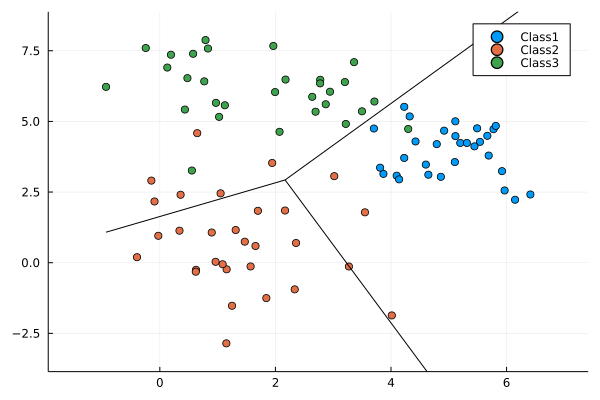

In [2]:
let
    N = 30 # 1つのクラスのサンプル数
    ind_mat1 = ones(N,3); ind_mat1[:,1] = randn(N) .*0.9 .+5.0; ind_mat1[:,2] = randn(N) .*0.9 .+4.0
    ind_mat2 = ones(N,3); ind_mat2[:,1] = randn(N) .*1.0 .+1.0; ind_mat2[:,2] = randn(N) .*1.5 .+0.5
    ind_mat3 = ones(N,3); ind_mat3[:,1] = randn(N) .*1.2 .+2.0; ind_mat3[:,2] = randn(N) .*1.0 .+6.0

    ind_mat = zeros(N*3, 3)
    ind_mat[1:N, 1:3] = ind_mat1; ind_mat[N+1:2N, 1:3] = ind_mat2; ind_mat[2N+1:3N, 1:3] = ind_mat3
    dep_mat = zeros(N*3, 3)
    dep_mat[1:N, 1] = ones(N); dep_mat[N+1:2N, 2] = ones(N); dep_mat[2N+1:3N, 3] = ones(N)

    # パラメータ推定
    η(t) = 0.05 / sqrt(1+t)
    W = multiclass_logistic_regression(ind_mat, dep_mat, SGD(zeros(3,3), η, 1e-4, 10000))

    confusion_mat = zeros(3,3)
    for i in (1:3N)
        estim = last(maximum(zip(W * ind_mat[i,:],1:3)))
        answer = last(maximum(zip(dep_mat[i,:],1:3)))
        confusion_mat[estim,answer] += 1
    end

    println("Confution matrix")
    println(confusion_mat[1,:])
    println(confusion_mat[2,:])
    println(confusion_mat[3,:])

    # 散布図と2クラスの境界線
    scatter( ind_mat1[:,1], ind_mat1[:,2], label="Class1")
    scatter!(ind_mat2[:,1], ind_mat2[:,2], label="Class2")
    scatter!(ind_mat3[:,1], ind_mat3[:,2], label="Class3")
    function getxrange(i1,i2)
        slope = (W[i1,1]*W[i2,2] - W[i1,2]*W[i2,1]) / (W[i2,2] - W[i1,2])
        return slope >= 0 ? [centerx, maximum(ind_mat[:,1])] : [minimum(ind_mat[:,1]), centerx]
    end

    f(x,i1,i2) = (W[i2,1]-W[i1,1])/(W[i1,2]-W[i2,2]) * x + (W[i2,3]-W[i1,3])/(W[i1,2]-W[i2,2])
    centerx = det([-W[1,3]  W[1,2] -1;-W[2,3]  W[2,2] -1;-W[3,3]  W[3,2] -1]) / det([W[1,1] W[1,2] -1;W[2,1] W[2,2] -1;W[3,1] W[3,2] -1])
    plot!(getxrange(1,2), x->f(x,1,2), label="", linecolor=:black)
    plot!(getxrange(2,3), x->f(x,2,3), label="", linecolor=:black)
    plot!(getxrange(1,3), x->f(x,1,3), label="", linecolor=:black)
    xlims!((minimum(ind_mat[:,1])-1, maximum(ind_mat[:,1])+1))
    ylims!((minimum(ind_mat[:,2])-1, maximum(ind_mat[:,2])+1))
end